In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm
from pmdarima.arima import ndiffs, nsdiffs


import yfinance as yf
yf.pdr_override()
df

,Close
Date,
2006-01-03,346.00
2006-01-04,346.25
2006-01-05,339.75
2006-01-06,330.75
2006-01-09,326.50
...,...
2022-06-03,1040.00
2022-06-06,1093.00
2022-06-07,1071.75


In [88]:
# getting Chicago SRW Wheat Futures Close price from yahoo finance and saving to dataframe
df = yf.download('ZW=F', start = '2006-01-01', end = '2022-06-09')['Close'].to_frame()

[*********************100%***********************]  1 of 1 completed


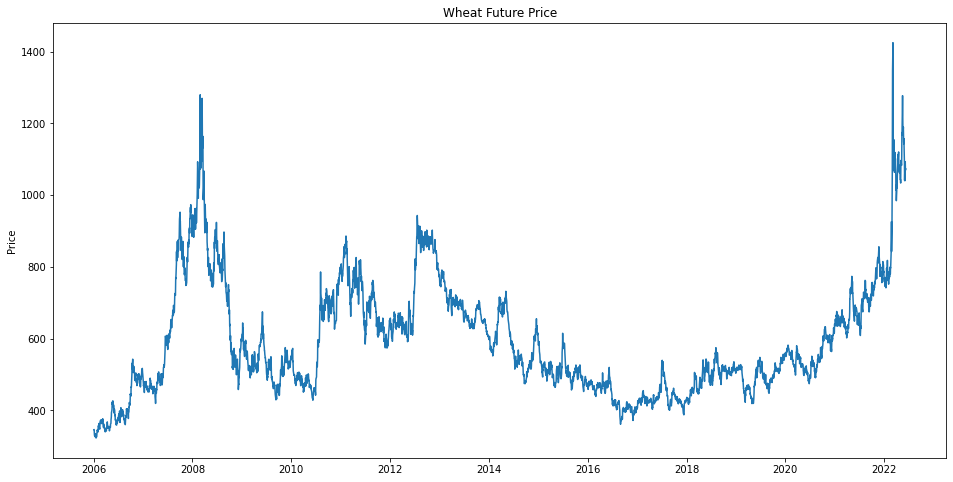

In [89]:

plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title('Wheat Future Price')
plt.ylabel('Price')
plt.show()


In [90]:
auto_arima = pm.auto_arima(df['Close'], 
                           error_action='ignore',
                           suppress_warnings=True,
                           seasonal=False)
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4137
Model:               SARIMAX(3, 1, 0)   Log Likelihood              -17007.735
Date:                Fri, 10 Jun 2022   AIC                          34023.471
Time:                        17:06:44   BIC                          34048.781
Sample:                             0   HQIC                         34032.427
                               - 4137                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0573      0.007      8.759      0.000       0.045       0.070
ar.L2          0.0154      0.006      2.427      0.015       0.003       0.028
ar.L3         -0.0758      0.005    -14.546      0.000      -0.086      -0.066
sigma2       218.5362      1.475    148.182      0.000     215.646     221.427
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             87346.35
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                             0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
auto_arima = pm.auto_arima(df['Close'], 
                           error_action='ignore',
                           suppress_warnings=True,
                           seasonal=False)
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4137
Model:               SARIMAX(3, 1, 0)   Log Likelihood              -17007.735
Date:                Fri, 10 Jun 2022   AIC                          34023.471
Time:                        17:06:54   BIC                          34048.781
Sample:                             0   HQIC                         34032.427
                               - 4137                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0573      0.007      8.759      0.000       0.045       0.070
ar.L2          0.0154      0.006      2.427      0.015       0.003       0.028
ar.L3         -0.0758      0.005    -14.546      0.000      -0.086      -0.066
sigma2       218.5362      1.475    148.182      0.000     215.646     221.427
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             87346.35
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                             0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
print("Suggested # of differences (ADF):", ndiffs(df['Close'], test='adf'))
print("Suggested # of differences (KPSS):", ndiffs(df['Close'], test='kpss'))
print("Suggested # of differences (PP):", ndiffs(df['Close'], test='pp'))

Suggested # of differences (ADF): 1
Suggested # of differences (KPSS): 1
Suggested # of differences (PP): 1


In [93]:
print("Suggested # of differences (OSCB):", nsdiffs(df['Close'], m=12, test='ocsb'))
print("Suggested # of differences (CH):", nsdiffs(df['Close'], m=12, test='ch'))

Suggested # of differences (OSCB): 0
Suggested # of differences (CH): 0


/Users/rishi/miniforge3/envs/data-science/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [94]:
kpss_diffs = ndiffs(df['Close'], alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(df['Close'], alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print("Estimated differencing term:", n_diffs)

Estimated differencing term: 1


In [95]:
train_len = int(df.shape[0] * 0.8)
train_data, test_data = df[:train_len], df[train_len:]

y_train = train_data['Close'].values
y_test = test_data['Close'].values

print("train samples:" , train_len)
print("test samples", df.shape[0] - train_len)

train samples: 3309
test samples 828


In [96]:
auto = pm.auto_arima(y_train, d=n_diffs, seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26722.471, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26753.547, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26751.344, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26750.787, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26751.568, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26741.075, Time=0.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26740.048, Time=0.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26723.337, Time=1.80 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=26723.261, Time=1.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26749.296, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=26741.197, Time=0.70 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26740.294, Time=0.48 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=26724.144, Time=1.50 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=26720.488, Time=0.66 sec
 ARIMA(1,1,2)(0,0,0

In [97]:
print(auto.order)

(2, 1, 2)


In [98]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model = auto

def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)
    
    # Updates the existing model with a small number of MLE steps
    model.update(new_ob)
    
print("Mean squared error:", mean_squared_error(y_test, forecasts))
print("SMAPE:", smape(y_test, forecasts))
print ("Forecast:", forecasts[-1])
# print mean squared percentage error
print("MSPE:", mean_squared_error(y_test, forecasts) / np.mean(y_test))
from sklearn.metrics import mean_absolute_error
print("MAE:", mean_absolute_error(y_test, forecasts))



Mean squared error: 343.51838909278536
SMAPE: 1.537562013479952
Forecast: 1072.1621166857663
MSPE: 0.5367097556809087
MAE: 10.680021879140948


In [99]:
x = np.arange(df.shape[0])

6920
66192


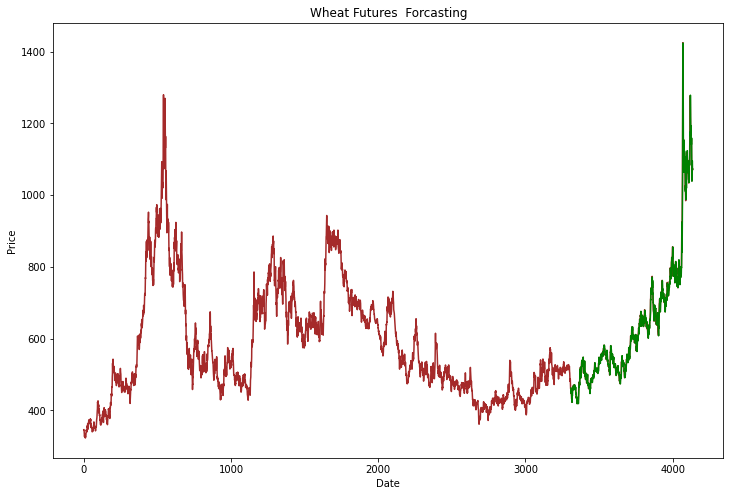

In [100]:
plt.figure(figsize=(12,8))
plt.plot(x, df['Close'],c = "brown" ,label='Actual')
plt.plot(x[train_len:], forecasts, c = "green", label='Forecast')
print(forecasts.__sizeof__())
print(df['Close'] .__sizeof__())
plt.title("Wheat Futures " + ' Forcasting')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [101]:
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)

statsmodels: 0.13.2


In [102]:
import joblib
import pickle

In [ ]:
with open('wheat.pkl', 'wb') as f:
    pickle.dump(model, f)

In [105]:
with open('wheat.pkl', 'rb') as f:
   model1 = pickle.load(f)
model1.fit(y_test)
model1.summary()
df1= df.tail(134)
forecasts1 = [0] * 365
confidence_intervals1 = []
for new_ob in forecasts1:
	fc, conf = model1.predict(n_periods=1, return_conf_int=True)
	forecasts1.append(fc)
	confidence_intervals1.append(conf)
	model1.update(new_ob)
print("Mean squared error:", mean_squared_error(df1['Close'], forecasts1))
print("SMAPE:", smape(df1['Close'], forecasts1))
print ("Forecast:", forecasts1[-1])
# print mean squared percentage error
print("MSPE:", mean_squared_error(df1['Close'], forecasts1) / np.mean(df1['Close']))
from sklearn.metrics import mean_absolute_error
print("MAE:", mean_absolute_error(df1['Close'], forecasts1))
x1 = np.arange(df1.shape[0])
print(forecasts1)
## graph forecasts1
plt.figure(figsize=(12,8))
plt.plot(x1, forecasts1, c = "green", label='Forecast')
plt.plot(x[4000:], df1['Close'], c = "brown", label='Actual', linewidth=0.25)
plt.title("Wheat Futures " + ' Forcasting')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()






KeyboardInterrupt: 